In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sanke\Desktop\train.csv")

In [3]:
df.head()

,order_time,order_id,order_date,allot_time,accept_time,pickup_time,delivered_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,lifetime_order_count,reassignment_method,reassignment_reason,reassigned_order,session_time,cancelled_time
0,2021-01-26 02:21:35,556753,2021-01-26 00:00:00,2021-01-26 02:21:59,2021-01-26 02:22:08,2021-01-26 02:32:51,2021-01-26 02:49:47,11696,1.5666,2.65,46.0,46.0,0,0.0,621.0,NaN,NaN,NaN,NaN,NaN
1,2021-01-26 02:33:16,556754,2021-01-26 00:00:00,2021-01-26 02:33:57,2021-01-26 02:34:45,2021-01-26 02:50:25,2021-01-26 03:11:15,18117,2.5207,2.76,8.0,8.0,0,0.0,105.0,NaN,NaN,NaN,3.266667,NaN
2,2021-01-26 02:39:49,556755,2021-01-26 00:00:00,2021-01-26 02:39:57,2021-01-26 02:40:13,2021-01-26 02:56:00,2021-01-26 03:12:46,18623,2.2074,4.80,1.0,1.0,0,0.0,66.0,NaN,NaN,NaN,9.816667,NaN
3,2021-01-26 02:47:53,556756,2021-01-26 00:00:00,2021-01-26 02:48:25,2021-01-26 02:49:06,2021-01-26 03:21:51,2021-01-26 03:41:05,15945,2.1894,6.38,1.0,1.0,0,0.0,127.0,NaN,NaN,NaN,17.533333,NaN
4,2021-01-26 03:06:30,556757,2021-01-26 00:00:00,2021-01-26 03:07:21,2021-01-26 03:07:57,2021-01-26 03:31:38,2021-01-26 04:00:15,17589,2.7870,4.01,34.0,34.0,0,0.0,84.0,NaN,NaN,NaN,1.350000,NaN


# DATA PRE-PROCESSING

In [4]:
df.drop(["delivered_time","pickup_time","cancelled_time","order_date"],axis=1,inplace=True)
#Delivered_time,pickup_time,cancelled_time are not in test data whereas order_date is already in order_time feature.

In [5]:
df.reassignment_method.fillna("Nill",inplace=True)


In [6]:
df.reassignment_reason.fillna("Nill",inplace=True)

In [7]:
df.reassigned_order.fillna(0,inplace=True)

In [8]:
df.isnull().sum()

order_time                  0
order_id                    0
allot_time                  0
accept_time               157
rider_id                    0
first_mile_distance         0
last_mile_distance          0
alloted_orders          16948
delivered_orders        17341
cancelled                   0
undelivered_orders      17341
lifetime_order_count       53
reassignment_method         0
reassignment_reason         0
reassigned_order            0
session_time             3675
dtype: int64

In [9]:
df.dropna(subset=["accept_time"],inplace=True)

In [10]:
df.alloted_orders.fillna(0,inplace=True)  
df.delivered_orders.fillna(0,inplace=True)
df.undelivered_orders.fillna(0,inplace=True)
df.lifetime_order_count.fillna(0,inplace=True)
df.session_time.fillna(0,inplace=True)

In [11]:
df.isnull().sum()

order_time              0
order_id                0
allot_time              0
accept_time             0
rider_id                0
first_mile_distance     0
last_mile_distance      0
alloted_orders          0
delivered_orders        0
cancelled               0
undelivered_orders      0
lifetime_order_count    0
reassignment_method     0
reassignment_reason     0
reassigned_order        0
session_time            0
dtype: int64

# Feature Engineering

In [12]:
df["order_time"]=pd.to_datetime(df["order_time"])

In [13]:
df["allot_time"]=pd.to_datetime(df["allot_time"])

In [14]:
df["accept_time"]=pd.to_datetime(df["accept_time"])

In [15]:
df["or_al_min"]=df["allot_time"]-df["order_time"]

In [16]:
df["or_al_min"] = df["or_al_min"].dt.total_seconds()/60

In [17]:
df["or_ac_min"]=df["accept_time"]-df["order_time"]

In [18]:
df["or_ac_min"] = df["or_ac_min"].dt.total_seconds()/60

In [19]:
df["al_ac_min"]=df["accept_time"]-df["allot_time"]

In [20]:
df["al_ac_min"]= df["al_ac_min"].dt.total_seconds()/60

In [21]:
df["total_dist"]=df.first_mile_distance+df.last_mile_distance

In [22]:
df["hour"]=df.order_time.dt.hour

In [23]:
df["day"]=df.order_time.dt.dayofweek

In [24]:
df["order_diff"]=df.alloted_orders-df.delivered_orders

In [25]:
df["month"]=df.order_time.dt.month

In [26]:
df.drop("order_id",axis=1,inplace=True)

In [27]:
df.head()

,order_time,allot_time,accept_time,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,cancelled,undelivered_orders,...,reassigned_order,session_time,or_al_min,or_ac_min,al_ac_min,total_dist,hour,day,order_diff,month
0,2021-01-26 02:21:35,2021-01-26 02:21:59,2021-01-26 02:22:08,11696,1.5666,2.65,46.0,46.0,0,0.0,...,0.0,0.000000,0.400000,0.550000,0.150000,4.2166,2,1,0.0,1
1,2021-01-26 02:33:16,2021-01-26 02:33:57,2021-01-26 02:34:45,18117,2.5207,2.76,8.0,8.0,0,0.0,...,0.0,3.266667,0.683333,1.483333,0.800000,5.2807,2,1,0.0,1
2,2021-01-26 02:39:49,2021-01-26 02:39:57,2021-01-26 02:40:13,18623,2.2074,4.80,1.0,1.0,0,0.0,...,0.0,9.816667,0.133333,0.400000,0.266667,7.0074,2,1,0.0,1
3,2021-01-26 02:47:53,2021-01-26 02:48:25,2021-01-26 02:49:06,15945,2.1894,6.38,1.0,1.0,0,0.0,...,0.0,17.533333,0.533333,1.216667,0.683333,8.5694,2,1,0.0,1
4,2021-01-26 03:06:30,2021-01-26 03:07:21,2021-01-26 03:07:57,17589,2.7870,4.01,34.0,34.0,0,0.0,...,0.0,1.350000,0.850000,1.450000,0.600000,6.7970,3,1,0.0,1


# Exploratory Data Analysis

In [28]:
df[df.cancelled==1].rider_id.value_counts()

17416    12
1248      6
15142     6
19208     6
15605     5
         ..
1527      1
18294     1
2659      1
6128      1
8696      1
Name: rider_id, Length: 3978, dtype: int64

In [29]:
df.groupby("cancelled").mean()

,rider_id,first_mile_distance,last_mile_distance,alloted_orders,delivered_orders,undelivered_orders,lifetime_order_count,reassigned_order,session_time,or_al_min,or_ac_min,al_ac_min,total_dist,hour,day,order_diff,month
cancelled,,,,,,,,,,,,,,,,,
0,7728.050778,1.229002,2.965057,101.096351,100.360768,0.735072,856.259810,0.029297,219.099773,1.146705,2.164133,1.017428,4.194059,12.720488,2.883840,0.735583,1.476069
1,10816.468682,1.300994,3.303327,64.966410,64.193242,0.705197,616.176843,0.140684,180.713334,7.452651,8.410838,0.958187,4.604321,12.995851,3.002766,0.773167,1.443391


In [30]:
df.groupby("reassignment_method").cancelled.value_counts()

reassignment_method  cancelled
Nill                 0            431757
                     1              4351
auto                 0             12698
                     1               684
manual               0               327
                     1                26
Name: cancelled, dtype: int64

<AxesSubplot:xlabel='cancelled', ylabel='count'>

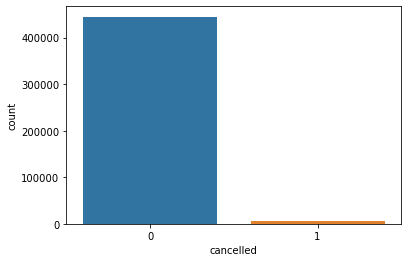

In [31]:
sns.countplot(df.cancelled)

# Encoding

In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["reassignment_method"])
df["reassignment_method"]=le.transform(df["reassignment_method"])
le.fit(df["reassignment_reason"])
df["reassignment_reason"]=le.transform(df["reassignment_reason"])

In [33]:
df.dtypes

order_time              datetime64[ns]
allot_time              datetime64[ns]
accept_time             datetime64[ns]
rider_id                         int64
first_mile_distance            float64
last_mile_distance             float64
alloted_orders                 float64
delivered_orders               float64
cancelled                        int64
undelivered_orders             float64
lifetime_order_count           float64
reassignment_method              int32
reassignment_reason              int32
reassigned_order               float64
session_time                   float64
or_al_min                      float64
or_ac_min                      float64
al_ac_min                      float64
total_dist                     float64
hour                             int64
day                              int64
order_diff                     float64
month                            int64
dtype: object

# Splitting the data

In [34]:
X=df[["reassignment_reason","reassignment_method","reassigned_order","day","hour","rider_id","first_mile_distance","last_mile_distance","alloted_orders","delivered_orders","undelivered_orders","lifetime_order_count","session_time","or_al_min","or_ac_min","al_ac_min","total_dist","order_diff","month"]]
y=df.cancelled

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=2022,stratify=y)

# Feature Importance

In [36]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [37]:
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

or_ac_min               0.082016
or_al_min               0.080861
rider_id                0.080438
session_time            0.077551
last_mile_distance      0.075690
first_mile_distance     0.075195
al_ac_min               0.074393
total_dist              0.074385
lifetime_order_count    0.071486
delivered_orders        0.063009
alloted_orders          0.062894
hour                    0.061889
day                     0.046652
order_diff              0.030411
undelivered_orders      0.021342
month                   0.010955
reassignment_reason     0.006347
reassigned_order        0.002707
reassignment_method     0.001782
dtype: float64

# Handling Imbalance

In [38]:
# SMOTE
import collections as k
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_train, y_train)

print('Original  shape', k.Counter(y_train))
print('Resampled shape', k.Counter(y_sm))

Original  shape Counter({0: 333586, 1: 3796})
Resampled shape Counter({0: 333586, 1: 333586})


<AxesSubplot:xlabel='cancelled', ylabel='count'>

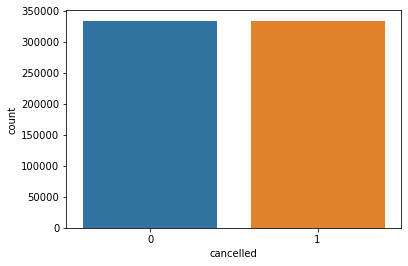

In [39]:
sns.countplot(y_sm)

In [40]:
#ADASYN
import collections as k
from imblearn.over_sampling import ADASYN
X_ada, y_ada  = ADASYN().fit_resample(X_train, y_train)
print('Original dataset shape', k.Counter(y_train))
print('Resample dataset shape', k.Counter(y_ada))

Original dataset shape Counter({0: 333586, 1: 3796})
Resample dataset shape Counter({1: 334054, 0: 333586})


<AxesSubplot:xlabel='cancelled', ylabel='count'>

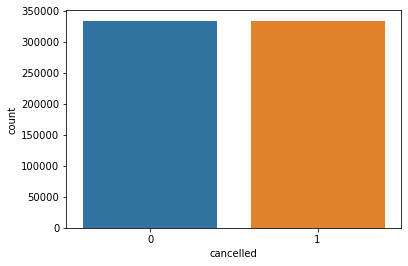

In [41]:
sns.countplot(y_ada)

# XGBOOST

In [45]:
params = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
               "min_child_weight" : [ 1, 3, 5, 7 ],
                "colsample_bytree" : [ 0.3, 0.4, 0.5 ,0.55,0.6, 0.7 ],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [46]:
import xgboost
from xgboost import XGBClassifier

In [47]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
model = XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)

In [49]:
random_search=RandomizedSearchCV(model,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [50]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, grow_policy='lossguide',
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_chil...
                                                  102.4, 200],
                                        'learning_rate': [0.01, 0.03, 0.06,

# Custom ensemble

In [59]:
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline

models = list()

BRFC = Pipeline([('m', BalancedRandomForestClassifier())])
models.append(('BalancedRandomForestClassifier',BRFC ))

EEC = Pipeline([('m', EasyEnsembleClassifier ())])
models.append(('EasyEnsembleClassifier',EEC))

BBC = Pipeline([('m',  BalancedBaggingClassifier())])
models.append(('BalancedBaggingClassifier',BBC))


RUSBC = Pipeline([('m',  RUSBoostClassifier())])
models.append(('RUSBoostClassifier',RUSBC))



ensemble = VotingClassifier(estimators=models, voting='hard')

In [60]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('BalancedRandomForestClassifier',
                              Pipeline(steps=[('m',
                                               BalancedRandomForestClassifier())])),
                             ('EasyEnsembleClassifier',
                              Pipeline(steps=[('m',
                                               EasyEnsembleClassifier())])),
                             ('BalancedBaggingClassifier',
                              Pipeline(steps=[('m',
                                               BalancedBaggingClassifier())])),
                             ('RUSBoostClassifier',
                              Pipeline(steps=[('m', RUSBoostClassifier())]))])

In [61]:
ensemble.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)